In [1]:
from dataclasses import dataclass, asdict

In [2]:
%run ../quantumsystem.ipynb

In [3]:
%run MovementSystem.ipynb

In [4]:
%run DamageSystem.ipynb

In [5]:
%run WeaponsSystem.ipynb

In [6]:
qs.quantum_system_name = "MechaCombatSystem"

In [7]:
class SizeSystem(QuantumSystem.System):
    edge_name = "size"

In [8]:
class SpecialSystem(QuantumSystem.System):
    edge_name = "special"

In [9]:
class Structure(QuantumSystem.HyperSystem):
    systems = [Location, ArmorSystem]
    
    @classmethod
    def height(cls, structureId):
        return 5

In [10]:
class MechTypeSystem(QuantumSystem.System):
    edge_name = "mech_type"

class MechModelSystem(QuantumSystem.System):
    edge_name = "mech_model"

class MechRoleSystem(QuantumSystem.System):
    edge_name = "mech_role"
    
class PointValueSystem(QuantumSystem.System):
    edge_name = "point_value"
    
class MechDefinitionSystem(QuantumSystem.HyperSystem):
    systems = [MechTypeSystem, MechModelSystem, MechRoleSystem, SizeSystem, SpecialSystem, PointValueSystem]

In [11]:
class UnitSystem(QuantumSystem.HyperSystem):
    systems = [MoveSystem, Weapons, UnitDamageSystem]

class MechSystem(QuantumSystem.HyperSystem):
    systems = [UnitSystem, MechDefinitionSystem]
    
@dataclass
class Mech(QuantumSystem.Entity):
    point_value: int
    mech_type: str
    mech_model: str
    size: int
    movement: int
    role: str
    weapons: str
    armor: str
    special: list
    location: list
    
    def __post_init__(self):
        assert self.entity_id is not None
        assert self.mech_model in ["Kingfisher Prime"], f"Invalid Mech Model: {self.mech_model}"

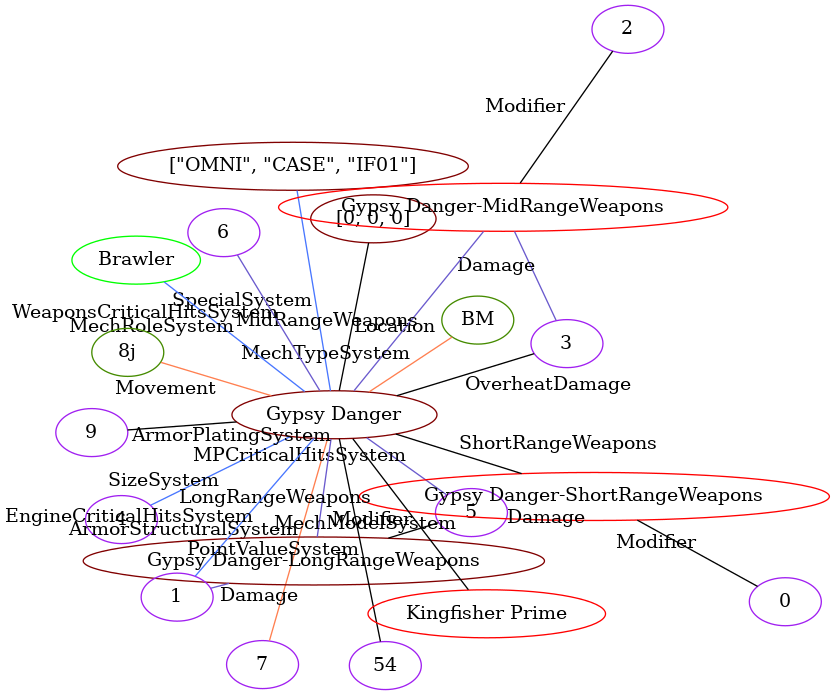

In [12]:
qs.reset()
MechSystem.build_system("Gypsy Danger", [
    [   # Unit System
        [  # Move System
            json.dumps([0, 0, 0]), "8j"
        ],
        [  # Weapons System
            [["0", "5"]], [["2", "3"]], [["5", "1"]], "1", "3"
        ],
        [  # Unit Damage System
            ["9", "7"], ["1", "4", "5", "6"]
        ]
    ],
    [  # Mech Definition System
        "BM", "Kingfisher Prime", "Brawler", "4", json.dumps(["OMNI", "CASE", "IF01"]), "54"
    ]
])
qs.render()

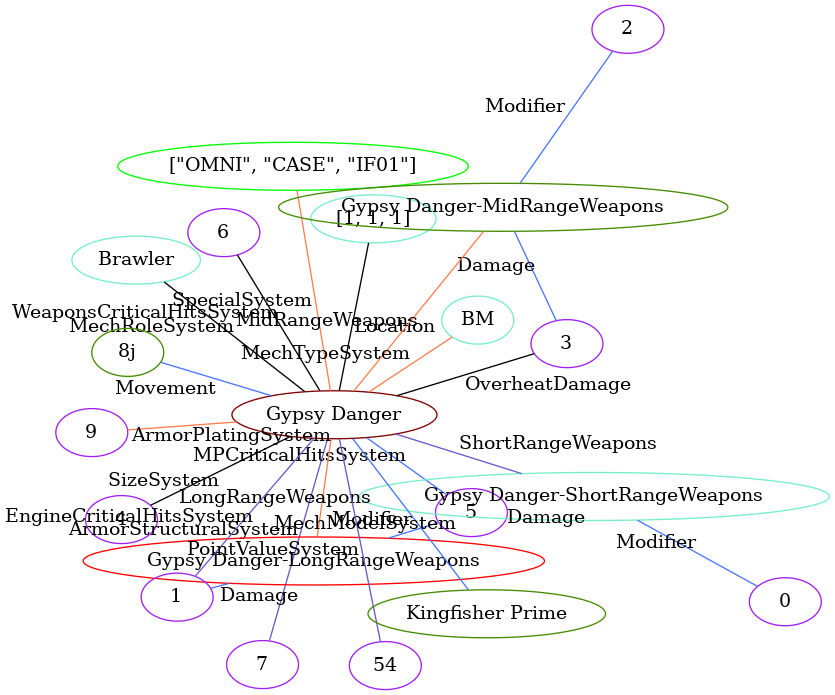

In [13]:
MoveSystem.move("Gypsy Danger", [1, 1, 1])
qs.render()

In [14]:
try:
    MoveSystem.move("Gypsy Danger", [15, 1, 1])
except AssertionError as ae:
    print(f"Received: {ae}")

Received: Cannot move unit further (15.066519173319364) than its movement speed (8)


In [15]:
try:
    MoveSystem.move("Apartment", [1, 0, 0])
except Exception as e:
    print(f"Received: {e}")

Received: Movement relationship not found on Apartment
